# SVD Classifier

revelvent infor has come so far from https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

and 

https://machinelearningmastery.com/singular-value-decomposition-for-dimensionality-reduction-in-python/


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
import random
#!pip install ProgressBar
from progressbar import ProgressBar
import math
#!{sys.executable} -m pip install ProgressBar
#!pip install ProgressBar
from random import randrange
from copy import copy, deepcopy

import glob
import json

#svd stuff
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [3]:
#load the titles and wheater the book is alive or dead into two seperate arrays
def loadResult():
    test_labels = []
    test_values = []
    with open('table-of-contents.json', encoding="utf8") as f:
        data = json.load(f)
        for books in data:
            for book in data[books]:
                test_labels.append(book['title'])
                test_values.append(book['dead'])
                
    return test_labels, test_values

#get the data from the data output file
def loadData():
    final_data = []
    with open('dataOutput2.json', encoding="utf8") as f:
        data = json.load(f)
        for index in data: 
            final_data.append(data[index]['chapData'][:-2])
    return final_data

In [4]:

                

title_labels, dead_labels = loadResult()
train = loadData()
print(len(train))
## Load the training set
train_data= np.array(train[:15705])
train_labels = np.array(dead_labels[:15705])
train_titles = np.array(title_labels[:15705])


## Load the testing set

test_data= np.array(train[-1000:])
test_labels = np.array(dead_labels[-1000:])
test_titles = np.array(title_labels[-1000:])


## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))



16705
Training dataset dimensions:  (15705, 69)
Number of training labels:  15705
Testing dataset dimensions:  (1000, 69)
Number of testing labels:  1000


In [11]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(10,30):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [12]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>10 0.877 (0.001)
>11 0.877 (0.001)
>12 0.877 (0.001)
>13 0.877 (0.001)
>14 0.877 (0.001)
>15 0.877 (0.001)
>16 0.877 (0.001)
>17 0.877 (0.001)
>18 0.877 (0.001)
>19 0.877 (0.001)
>20 0.877 (0.001)
>21 0.877 (0.001)
>22 0.877 (0.001)
>23 0.877 (0.001)
>24 0.878 (0.001)
>25 0.877 (0.001)
>26 0.877 (0.001)
>27 0.877 (0.001)
>28 0.877 (0.001)
>29 0.877 (0.001)


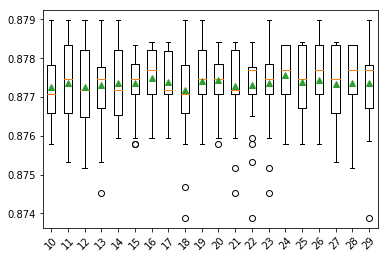

In [13]:
# define dataset
X = np.array(train_data)
y = np.array(train_labels)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [17]:
# define the model
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = test_data[:][-2:]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

ValueError: Expected 2D array, got 1D array instead:
array=[445  46].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.